In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from os import mkdir,listdir
from os.path import exists
import python_speech_features
from scipy.signal.windows import hamming
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

In [3]:
def create_dir(dir_path):
    try:
        print("Criando pasta: " + dir_path)
        mkdir(dir_path)
    except OSError as error:
        print(error)
        print() 

In [10]:
def path_to_save_func(audio_path, complemento, pasta = None):

    if pasta != None:
        path_pasta = audio_path + "/" + pasta
        if not exists(path_pasta):
            create_dir(path_pasta)

    splited = audio_path.split("/")
    file_name = splited[-1].replace(".wav", "")
    path_to_save = "/".join(splited[:len(splited) - 1]) + "/" + file_name + "_" + complemento + ".wav"
    print(path_to_save)
    return path_to_save

In [11]:
def calcular_zcr(audio_path):
    # Carregar o arquivo de áudio
    y, sr = librosa.load(audio_path, sr=None)

    # Calcular o Zero-Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y)
    print("total de janelas ", len(zcr[0]))

    # Mostrar resultados
    #print("Zero-Crossing Rate (primeiras janelas):", zcr[:, :5])  # Primeiras 5 janelas

    # Criar eixo do tempo
    #frames = range(len(zcr[0]))
    #t = librosa.frames_to_time(frames, sr=sr)

    # Plotar
    #plt.figure(figsize=(10, 4))
    #plt.plot(t, zcr[0], label="ZCR")
    #plt.xlabel("Tempo (s)")
    #plt.ylabel("Zero-Crossing Rate")
    #plt.title("Zero-Crossing Rate ao longo do tempo")
    #plt.legend()
    #plt.show()

calcular_zcr("D:/mestrado/separacao_svd_a_3_tons_aumentado/disfonia/feminino/368-disfonia_f_a_alto.wav")



total de janelas  186


In [10]:
def plot_energia_rmse(title=True):
    # Carregar o arquivo de áudio
    audio_path_1 = "D:/mestrado/separacao_svd_a_3_tons_aumentado/disfonia/feminino/368-disfonia_f_a_alto.wav"
    audio_path_2 = "D:/mestrado/separacao_svd_a_3_tons_aumentado/disfonia/feminino/368-disfonia_f_a_neutro.wav"
    audio_path_3 = "D:/mestrado/separacao_svd_a_3_tons_aumentado/disfonia/feminino/368-disfonia_f_a_baixo.wav"
    y_1, sr_1 = librosa.load(audio_path_1, sr=None)
    y_2, sr_2 = librosa.load(audio_path_2, sr=None)
    y_3, sr_3 = librosa.load(audio_path_3, sr=None)

    # Calcular o Root-Mean-Square Energy
    # Por padrão, usa janelas (frames) com tamanho de 2048 amostras e um hop size (passo entre janelas) de 512 amostras.
    # Mais preciso recebendo um espectrograma ao invés do sinal. Para passar o espectrograma usar: S=
    rmse_1 = librosa.feature.rms(y=y_1)
    rmse_2 = librosa.feature.rms(y=y_2)
    rmse_3 = librosa.feature.rms(y=y_3)

    # Mostrar algumas janelas de RMSE
    print("RMSE (primeiras janelas):", rmse_1[:, :5])
    print("total de janelas ", len(rmse_1[0]))

    # Criar eixo do tempo para o RMSE
    frames_1 = range(len(rmse_1[0]))
    t_1 = librosa.frames_to_time(frames_1, sr=sr_1)

    frames_2 = range(len(rmse_2[0]))
    t_2 = librosa.frames_to_time(frames_2, sr=sr_2)

    frames_3 = range(len(rmse_3[0]))
    t_3 = librosa.frames_to_time(frames_3, sr=sr_3)

    # Plotar RMSE
    plt.figure(figsize=(10, 4))
    plt.plot(t_1, rmse_1[0], label="Tom alto", color='orange')
    plt.plot(t_2, rmse_2[0], label="Tom neutro", color='cornflowerblue')
    plt.plot(t_3, rmse_3[0], label="Tom baixo", color='lightcoral')
    plt.xlabel("Tempo (s)")
    plt.ylabel("Energia RMSE")
    if title:
        plt.title("Energia RMSE ao longo do tempo")
    plt.legend()
    plt.show()


RMSE (primeiras janelas): [[0.1300299  0.1623184  0.18626517 0.18931378 0.1874645 ]]
total de janelas  186


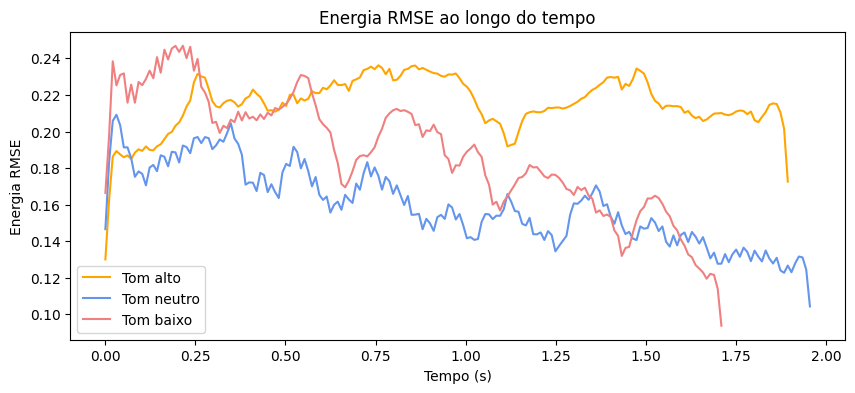

RMSE (primeiras janelas): [[0.1300299  0.1623184  0.18626517 0.18931378 0.1874645 ]]
total de janelas  186


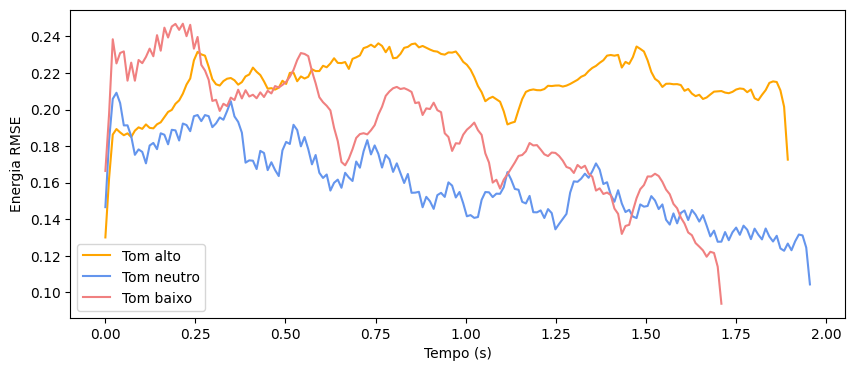

In [11]:
plot_energia_rmse()
plot_energia_rmse(False)

In [12]:
def plot_energia_rmse_saudavel(title=True):
    # Carregar o arquivo de áudio
    audio_path_1 = "D:/mestrado/separacao_svd_a_3_tons_aumentado/saudavel/feminino/6-saudavel_f_a_alto.wav"
    audio_path_2 = "D:/mestrado/separacao_svd_a_3_tons_aumentado/saudavel/feminino/6-saudavel_f_a_neutro.wav"
    audio_path_3 = "D:/mestrado/separacao_svd_a_3_tons_aumentado/saudavel/feminino/6-saudavel_f_a_baixo.wav"
    y_1, sr_1 = librosa.load(audio_path_1, sr=None)
    y_2, sr_2 = librosa.load(audio_path_2, sr=None)
    y_3, sr_3 = librosa.load(audio_path_3, sr=None)

    # Calcular o Root-Mean-Square Energy
    # Por padrão, usa janelas (frames) com tamanho de 2048 amostras e um hop size (passo entre janelas) de 512 amostras.
    # Mais preciso recebendo um espectrograma ao invés do sinal. Para passar o espectrograma usar: S=
    rmse_1 = librosa.feature.rms(y=y_1)
    rmse_2 = librosa.feature.rms(y=y_2)
    rmse_3 = librosa.feature.rms(y=y_3)

    # Mostrar algumas janelas de RMSE
    print("RMSE (primeiras janelas):", rmse_1[:, :5])
    print("total de janelas ", len(rmse_1[0]))

    # Criar eixo do tempo para o RMSE
    frames_1 = range(len(rmse_1[0]))
    t_1 = librosa.frames_to_time(frames_1, sr=sr_1)

    frames_2 = range(len(rmse_2[0]))
    t_2 = librosa.frames_to_time(frames_2, sr=sr_2)

    frames_3 = range(len(rmse_3[0]))
    t_3 = librosa.frames_to_time(frames_3, sr=sr_3)

    # Plotar RMSE
    plt.figure(figsize=(10, 4))
    plt.plot(t_1, rmse_1[0], label="Tom alto", color='orange')
    plt.plot(t_2, rmse_2[0], label="Tom neutro", color='cornflowerblue')
    plt.plot(t_3, rmse_3[0], label="Tom baixo", color='lightcoral')
    plt.xlabel("Tempo (s)")
    plt.ylabel("Energia RMSE")
    if title:
        plt.title("Energia RMSE ao longo do tempo")
    plt.legend()
    plt.show()


RMSE (primeiras janelas): [[0.31941026 0.39257565 0.454848   0.45498827 0.45345974]]
total de janelas  62


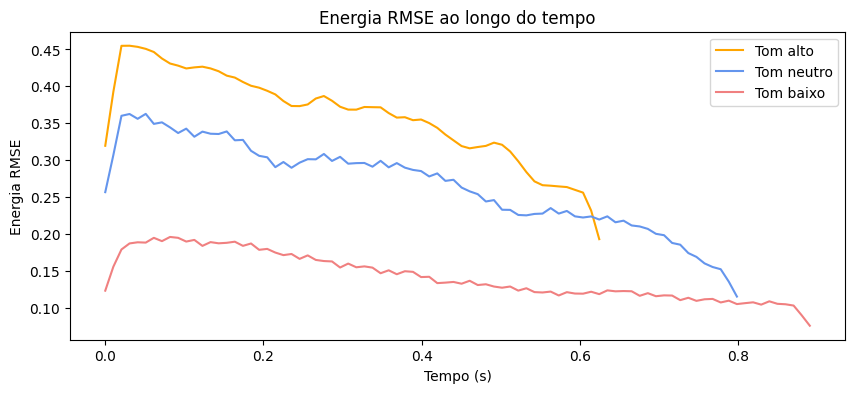

RMSE (primeiras janelas): [[0.31941026 0.39257565 0.454848   0.45498827 0.45345974]]
total de janelas  62


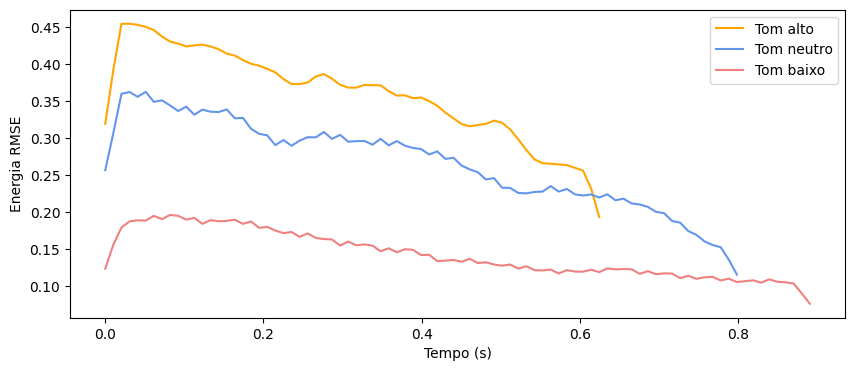

In [13]:
plot_energia_rmse_saudavel()
plot_energia_rmse_saudavel(False)

In [13]:
def extract_train_features_python_speech(audio_path):
    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(audio_path, sr=None)

    # Definir o número de frames desejado
    num_frames_desejado = 158

    # Definir winlen (tamanho da janela, em segundos)
    winlen = 0.025  # 25ms (típico)

    # Calcular o número de frames baseado no winlen e winstep
    audio_duracao = len(X) / sr  # Duração total do áudio em segundos

    # Cálculo de winstep para obter o número desejado de frames
    winstep = (audio_duracao - winlen) / (num_frames_desejado - 1)

    feature_mfcc = python_speech_features.mfcc(signal=X, samplerate=sample_rate, winlen=winlen, winstep=winstep,
                                       numcep=20, nfft=2048, highfreq=None, preemph=0.97, ceplifter=0, appendEnergy=True, winfunc=hamming)
    
    feature_mfcc = feature_mfcc.T
    feature_mfcc = np.asarray(feature_mfcc)

    # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series
    mfccs = np.mean(feature_mfcc,axis=0)
    print("tamanho mfccs ", len(mfccs))

    return mfccs

In [15]:
# Extrai o RMSE, ZCR e os 20 Coeficientes MFCCC do áudio
# Return: Pandas Dataframe cujas linhas são os frames do áudio
def extract_features(audio_path):
    # Carregar o áudio
    audio_name = audio_path.split("/")[-1].replace(".wav", "")
    y, sr = librosa.load(audio_path, sr=None)

    # Calcular RMSE e ZCR
    rmse = librosa.feature.rms(y=y)[0]  # [0] para converter de matriz para vetor
    zcr = librosa.feature.zero_crossing_rate(y)[0]

    num_frames_desejado = len(rmse)
    winlen = 0.025  # 25ms (típico)
    audio_duracao = len(y) / sr
    winstep = (audio_duracao - winlen) / (num_frames_desejado - 1)
    n_fft = int(winlen * sr)
    print('n_fft ', n_fft)

    num_cep = 20
    feature_mfcc = python_speech_features.mfcc(signal=y, samplerate=sr, winlen=winlen, winstep=winstep,
                                        numcep=num_cep, nfft=n_fft, highfreq=None, preemph=0.97, ceplifter=0, appendEnergy=True, winfunc=hamming)

    feature_mfcc = np.asarray(feature_mfcc)

    print('Áudio ', audio_name, ' com tamanho de rmse: ', len(rmse))
    print('Áudio ', audio_name, ' com tamanho de zcr: ', len(zcr))
    print('Áudio ', audio_name, ' com tamanho de feature_mfcc: ', len(feature_mfcc))

    # Criar um Pandas DataFrame
    df_rz = pd.DataFrame({
        'RMSE': rmse,
        'ZCR': zcr
    })

    df_mfccs = pd.DataFrame(feature_mfcc)
    df_mfccs.columns = [f"COEF_{i+1}" for i in range(feature_mfcc.shape[1])]

    df_metricas = pd.concat([df_rz, df_mfccs.reindex(df_rz.index)], axis=1)
    df_metricas['Audio'] = audio_name
    df_metricas['Label Binario'] = 'saudavel' if 'saudavel' in audio_name else 'patologico'

    categoria = None
    if 'disfonia' in audio_name:
        categoria = 'disfonia'
    elif 'laringite' in audio_name:
        categoria = 'laringite'
    elif 'paralisia' in audio_name:
        categoria = 'paralisia'
    elif 'polipo' in audio_name:
        categoria = 'polipo'
    elif 'saudavel' in audio_name:
        categoria = 'saudavel'

    df_metricas['Label Multiclasse'] = categoria

    print('df_rz shape ', df_rz.shape)
    print('df_mfccs shape ', df_mfccs.shape)

    # Exibir as primeiras linhas do DataFrame
    print()

    colunas_nan_df_rz = df_rz.columns[df_rz.isna().any()].tolist()
    print('Colunas NaN df_rz: ', colunas_nan_df_rz)
    colunas_nan_df_mfccs = df_mfccs.columns[df_mfccs.isna().any()].tolist()
    print('Colunas NaN df_mfccs: ', colunas_nan_df_mfccs)
    colunas_nan_df_metricas = df_metricas.columns[df_metricas.isna().any()].tolist()
    print('Colunas NaN df_metricas: ', colunas_nan_df_metricas)

    print()
    print('Áudio ', audio_name, ' processado!')
    print('------------------------------------------------------------------------')
    return df_metricas


In [2]:
path_csvs = "D:/mestrado/notebooks/dados/features_csv"
cols_to_scale = ['RMSE', 'ZCR', 'COEF_1', 'COEF_2', 'COEF_3', 'COEF_4', 'COEF_5', 'COEF_6', 'COEF_7', 'COEF_8', 'COEF_9', 'COEF_10', 'COEF_11', 'COEF_12', 'COEF_13', 'COEF_14', 'COEF_15', 'COEF_16', 'COEF_17', 'COEF_18', 'COEF_19', 'COEF_20']

---

In [12]:
path_database = "D:/mestrado/separacao_svd_a_3_tons_aumentado/saudavel/feminino"

count = 0
for file in listdir(path_database):
    audio_path = path_database + "/" + file
    audio_features_df = extract_features(audio_path)

    if count == 0:
        df_feminino_saudavel =  audio_features_df
    else:
        df_feminino_saudavel = pd.concat([df_feminino_saudavel, audio_features_df], axis=0, ignore_index=True)
    count += 1

print("df_feminino_saudavel possui NaN? ")
print(df_feminino_saudavel.isna().any())

df_feminino_saudavel.to_csv(path_csvs + "/" + "feminino_saudavel" + '.csv', sep=";", index=False)

n_fft  1250
Áudio  1-saudavel_f_a_neutro  com tamanho de rmse:  191
Áudio  1-saudavel_f_a_neutro  com tamanho de zcr:  191
Áudio  1-saudavel_f_a_neutro  com tamanho de feature_mfcc:  192
df_rz shape  (191, 2)
df_mfccs shape  (192, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  1-saudavel_f_a_neutro  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  2-saudavel_f_a_neutro  com tamanho de rmse:  75
Áudio  2-saudavel_f_a_neutro  com tamanho de zcr:  75
Áudio  2-saudavel_f_a_neutro  com tamanho de feature_mfcc:  75
df_rz shape  (75, 2)
df_mfccs shape  (75, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  2-saudavel_f_a_neutro  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  3-saudavel_f_a_neutro  com tamanho de rmse:  111
Áudio  3-saudavel_f_a_neutro  com tamanho de zcr:  111
Áudio  3-saudavel_f_a_

In [16]:
path_database = "D:/mestrado/separacao_svd_a_3_tons_aumentado/saudavel/feminino"

count = 0
for file in listdir(path_database):
    if count == 250: 
        break
    
    audio_path = path_database + "/" + file
    audio_features_df = extract_features(audio_path)

    if count == 0:
        df_feminino_saudavel_250 =  audio_features_df
    else:
        df_feminino_saudavel_250 = pd.concat([df_feminino_saudavel_250, audio_features_df], axis=0, ignore_index=True)
    count += 1

print("df_feminino_saudavel_250 possui NaN? ")
print(df_feminino_saudavel_250.isna().any())

n_fft  1250
Áudio  1-saudavel_f_a_neutro  com tamanho de rmse:  191
Áudio  1-saudavel_f_a_neutro  com tamanho de zcr:  191
Áudio  1-saudavel_f_a_neutro  com tamanho de feature_mfcc:  192
df_rz shape  (191, 2)
df_mfccs shape  (192, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  1-saudavel_f_a_neutro  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  2-saudavel_f_a_neutro  com tamanho de rmse:  75
Áudio  2-saudavel_f_a_neutro  com tamanho de zcr:  75
Áudio  2-saudavel_f_a_neutro  com tamanho de feature_mfcc:  75
df_rz shape  (75, 2)
df_mfccs shape  (75, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  2-saudavel_f_a_neutro  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  3-saudavel_f_a_neutro  com tamanho de rmse:  111
Áudio  3-saudavel_f_a_neutro  com tamanho de zcr:  111
Áudio  3-saudavel_f_a_

In [19]:
print(len(pd.unique(df_feminino_saudavel_250['Audio'])))
if len(pd.unique(df_feminino_saudavel_250['Audio'])) == 250:
    df_feminino_saudavel_250.to_csv(path_csvs + "/" + "feminino_saudavel_250" + '.csv', sep=";", index=False)

250


In [13]:
normalized_data = df_feminino_saudavel.copy()
# Normalizando as colunas com MinMaxScaler
scaler_feminino_saudavel = MinMaxScaler(feature_range=(-1,1))
normalized_data[cols_to_scale] = scaler_feminino_saudavel.fit_transform(df_feminino_saudavel[cols_to_scale])

normalized_data.to_csv(path_csvs + "/" + "feminino_saudavel_normalizado" + '.csv', sep=";", index=False)

# Salvar o escalador
joblib.dump(scaler_feminino_saudavel, path_csvs + "/" + 'scaler_feminino_saudavel.pkl')

normalized_data.head()


,RMSE,ZCR,COEF_1,COEF_2,COEF_3,COEF_4,COEF_5,COEF_6,COEF_7,COEF_8,...,COEF_14,COEF_15,COEF_16,COEF_17,COEF_18,COEF_19,COEF_20,Audio,Label Binario,Label Multiclasse
0,-0.685441,-0.511111,0.121357,-0.178008,-0.084506,-0.084545,-0.050496,-0.014638,-0.274974,-0.284385,...,0.008676,-0.227820,-0.328443,-0.071048,-0.449750,-0.238995,-0.326118,1-saudavel_f_a_neutro,saudavel,saudavel
1,-0.575809,-0.274074,0.117648,-0.043031,-0.111065,0.008134,-0.073274,0.128899,-0.254037,-0.207808,...,0.239025,-0.170651,-0.377772,0.022380,-0.364234,-0.203042,-0.340148,1-saudavel_f_a_neutro,saudavel,saudavel
2,-0.485763,-0.007407,0.137736,-0.161759,-0.182087,0.000618,-0.112447,0.101862,-0.359794,-0.236177,...,0.059454,-0.271058,-0.305764,-0.068441,-0.447161,-0.183605,-0.353661,1-saudavel_f_a_neutro,saudavel,saudavel
3,-0.476089,0.051852,0.143389,-0.153347,-0.134436,0.027524,-0.057777,0.158919,-0.362584,-0.161580,...,0.149859,-0.273259,-0.216693,-0.050376,-0.346797,-0.257873,-0.207564,1-saudavel_f_a_neutro,saudavel,saudavel
4,-0.484432,0.051852,0.141719,-0.131117,-0.280964,0.020472,-0.134354,0.080713,-0.394117,-0.314921,...,-0.106150,-0.192011,-0.339628,-0.166988,-0.394545,-0.218733,-0.345672,1-saudavel_f_a_neutro,saudavel,saudavel


In [21]:
normalized_data_250 = df_feminino_saudavel_250.copy()
# Normalizando as colunas com MinMaxScaler
scaler_feminino_saudavel_250 = MinMaxScaler(feature_range=(-1,1))
normalized_data_250[cols_to_scale] = scaler_feminino_saudavel_250.fit_transform(df_feminino_saudavel_250[cols_to_scale])

normalized_data_250.to_csv(path_csvs + "/" + "feminino_saudavel_normalizado_250" + '.csv', sep=";", index=False)

# Salvar o escalador
joblib.dump(scaler_feminino_saudavel_250, path_csvs + "/" + 'scaler_feminino_saudavel_250.pkl')

normalized_data_250.head()


,RMSE,ZCR,COEF_1,COEF_2,COEF_3,COEF_4,COEF_5,COEF_6,COEF_7,COEF_8,...,COEF_14,COEF_15,COEF_16,COEF_17,COEF_18,COEF_19,COEF_20,Audio,Label Binario,Label Multiclasse
0,-0.703868,-0.606299,0.142940,-0.268955,-0.061615,-0.268091,-0.146514,-0.014638,-0.345417,-0.304998,...,0.073587,-0.152479,-0.266567,0.283870,-0.138283,0.154335,-0.162515,1-saudavel_f_a_neutro,saudavel,saudavel
1,-0.576647,-0.354331,0.138987,-0.123557,-0.091444,-0.146938,-0.173145,0.128899,-0.319347,-0.219937,...,0.318760,-0.082725,-0.320441,0.415512,-0.004361,0.210555,-0.183703,1-saudavel_f_a_neutro,saudavel,saudavel
2,-0.472153,-0.070866,0.160396,-0.251452,-0.171210,-0.156764,-0.218944,0.101862,-0.451029,-0.251449,...,0.127633,-0.205237,-0.241798,0.287544,-0.134228,0.240950,-0.204112,1-saudavel_f_a_neutro,saudavel,saudavel
3,-0.460927,-0.007874,0.166420,-0.242390,-0.117692,-0.121590,-0.155026,0.158919,-0.454503,-0.168587,...,0.223856,-0.207922,-0.144520,0.312998,0.022947,0.124815,0.016530,1-saudavel_f_a_neutro,saudavel,saudavel
4,-0.470609,-0.007874,0.164640,-0.218444,-0.282259,-0.130810,-0.244557,0.080713,-0.493766,-0.338918,...,-0.048628,-0.108788,-0.278783,0.148691,-0.051830,0.186020,-0.192046,1-saudavel_f_a_neutro,saudavel,saudavel


In [14]:
path_database = "D:/mestrado/separacao_svd_a_3_tons_aumentado/disfonia/feminino"

count = 0
for file in listdir(path_database):
    audio_path = path_database + "/" + file
    audio_features_df = extract_features(audio_path)

    if count == 0:
        df_feminino_disfonia =  audio_features_df
    else:
        df_feminino_disfonia = pd.concat([df_feminino_disfonia, audio_features_df], axis=0, ignore_index=True)
    count += 1

print("df_feminino_disfonia possui NaN? ")
print(df_feminino_disfonia.isna().any())

df_feminino_disfonia.to_csv(path_csvs + "/" + "feminino_disfonia" + '.csv', sep=";", index=False)

n_fft  1250
Áudio  2583-disfonia_f_a_neutro  com tamanho de rmse:  185
Áudio  2583-disfonia_f_a_neutro  com tamanho de zcr:  185
Áudio  2583-disfonia_f_a_neutro  com tamanho de feature_mfcc:  186
df_rz shape  (185, 2)
df_mfccs shape  (186, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  2583-disfonia_f_a_neutro  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  2607-disfonia_f_a_neutro  com tamanho de rmse:  124
Áudio  2607-disfonia_f_a_neutro  com tamanho de zcr:  124
Áudio  2607-disfonia_f_a_neutro  com tamanho de feature_mfcc:  124
df_rz shape  (124, 2)
df_mfccs shape  (124, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  2607-disfonia_f_a_neutro  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  368-disfonia_f_a_neutro  com tamanho de rmse:  192
Áudio  368-disfonia_f_a_neutro  com tamanho de

In [15]:
normalized_data = df_feminino_disfonia.copy()
# Normalizando as colunas com MinMaxScaler
scaler_feminino_disfonia = MinMaxScaler(feature_range=(-1,1))
normalized_data[cols_to_scale] = scaler_feminino_disfonia.fit_transform(df_feminino_disfonia[cols_to_scale])

normalized_data.to_csv(path_csvs + "/" + "feminino_disfonia_normalizado" + '.csv', sep=";", index=False)

# Salvar o escalador
joblib.dump(scaler_feminino_disfonia, path_csvs + "/" + 'scaler_feminino_disfonia.pkl')

normalized_data.head()

,RMSE,ZCR,COEF_1,COEF_2,COEF_3,COEF_4,COEF_5,COEF_6,COEF_7,COEF_8,...,COEF_14,COEF_15,COEF_16,COEF_17,COEF_18,COEF_19,COEF_20,Audio,Label Binario,Label Multiclasse
0,-0.515796,-0.935564,-0.007341,0.702159,0.167090,0.137820,0.091195,-0.127038,-0.060272,0.683259,...,0.488816,0.180111,-0.337470,-0.061166,0.039359,-0.470411,-0.180755,2583-disfonia_f_a_neutro,patologico,disfonia
1,-0.372264,-0.900867,-0.022987,0.699735,0.175090,0.162464,0.048787,-0.067695,-0.057454,0.602664,...,0.442524,0.217840,-0.424841,0.022914,0.045451,-0.481561,-0.065944,2583-disfonia_f_a_neutro,patologico,disfonia
2,-0.265795,-0.861214,-0.012809,0.689133,0.188743,0.166358,0.033080,-0.117293,-0.051314,0.689141,...,0.525682,0.184777,-0.354476,0.067730,0.026291,-0.548674,-0.141514,2583-disfonia_f_a_neutro,patologico,disfonia
3,-0.301426,-0.873606,-0.064827,0.673115,0.156481,0.241999,0.093699,-0.155103,-0.001880,0.627511,...,0.569327,0.202097,-0.382755,-0.003269,0.070179,-0.437534,-0.261230,2583-disfonia_f_a_neutro,patologico,disfonia
4,-0.318515,-0.881041,-0.068274,0.669738,0.229116,0.197704,0.060397,-0.102621,0.025469,0.548966,...,0.609580,0.173431,-0.454408,0.058246,0.070872,-0.418391,-0.318080,2583-disfonia_f_a_neutro,patologico,disfonia


In [16]:
path_database = "D:/mestrado/separacao_svd_a_3_tons_aumentado/laringite/feminino"

count = 0
for file in listdir(path_database):
    audio_path = path_database + "/" + file
    audio_features_df = extract_features(audio_path)

    if count == 0:
        df_feminino_laringite =  audio_features_df
    else:
        df_feminino_laringite = pd.concat([df_feminino_laringite, audio_features_df], axis=0, ignore_index=True)
    count += 1

print("df_feminino_laringite possui NaN? ")
print(df_feminino_laringite.isna().any())

df_feminino_laringite.to_csv(path_csvs + "/" + "feminino_laringite" + '.csv', sep=";", index=False)

n_fft  1250
Áudio  498-laringite_f_a_neutro  com tamanho de rmse:  110
Áudio  498-laringite_f_a_neutro  com tamanho de zcr:  110
Áudio  498-laringite_f_a_neutro  com tamanho de feature_mfcc:  111
df_rz shape  (110, 2)
df_mfccs shape  (111, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  498-laringite_f_a_neutro  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  568-laringite_f_a_neutro  com tamanho de rmse:  189
Áudio  568-laringite_f_a_neutro  com tamanho de zcr:  189
Áudio  568-laringite_f_a_neutro  com tamanho de feature_mfcc:  189
df_rz shape  (189, 2)
df_mfccs shape  (189, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  568-laringite_f_a_neutro  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  844-laringite_f_a_neutro  com tamanho de rmse:  74
Áudio  844-laringite_f_a_neutro  com tamanho d

In [17]:
normalized_data = df_feminino_laringite.copy()
# Normalizando as colunas com MinMaxScaler
scaler_feminino_laringite = MinMaxScaler(feature_range=(-1,1))
normalized_data[cols_to_scale] = scaler_feminino_laringite.fit_transform(df_feminino_laringite[cols_to_scale])

normalized_data.to_csv(path_csvs + "/" + "feminino_laringite_normalizado" + '.csv', sep=";", index=False)

# Salvar o escalador
joblib.dump(scaler_feminino_laringite, path_csvs + "/" + 'scaler_feminino_laringite.pkl')

normalized_data.head()

,RMSE,ZCR,COEF_1,COEF_2,COEF_3,COEF_4,COEF_5,COEF_6,COEF_7,COEF_8,...,COEF_14,COEF_15,COEF_16,COEF_17,COEF_18,COEF_19,COEF_20,Audio,Label Binario,Label Multiclasse
0,-0.280832,-0.980488,-0.101527,0.426639,0.349733,0.373357,0.234588,0.300036,-0.188236,0.556487,...,0.578859,-0.125316,0.067461,0.311392,-0.045181,-0.304488,0.421288,498-laringite_f_a_neutro,patologico,laringite
1,-0.127755,-0.960976,-0.131901,0.449902,0.286775,0.402920,0.233524,0.395933,-0.163763,0.430025,...,0.563718,-0.048118,0.113225,0.241950,-0.039112,-0.310890,0.278577,498-laringite_f_a_neutro,patologico,laringite
2,0.004611,-0.945366,-0.145419,0.443710,0.348998,0.367950,0.331891,0.307086,-0.231018,0.568419,...,0.503110,-0.165507,0.068860,0.490627,-0.213857,-0.411406,0.445223,498-laringite_f_a_neutro,patologico,laringite
3,-0.011437,-0.937561,-0.155072,0.490204,0.409401,0.263389,0.292162,0.340684,-0.102962,0.514655,...,0.510898,-0.224146,0.265505,0.420213,-0.160467,-0.425747,0.262483,498-laringite_f_a_neutro,patologico,laringite
4,-0.022975,-0.933659,-0.142124,0.493352,0.393903,0.288645,0.246563,0.326967,-0.087200,0.573151,...,0.613117,-0.090749,0.114079,0.330582,-0.047515,-0.383113,0.253726,498-laringite_f_a_neutro,patologico,laringite


In [18]:
path_database = "D:/mestrado/separacao_svd_a_3_tons_aumentado/paralisia/feminino"

count = 0
for file in listdir(path_database):
    audio_path = path_database + "/" + file
    audio_features_df = extract_features(audio_path)

    if count == 0:
        df_feminino_paralisia =  audio_features_df
    else:
        df_feminino_paralisia = pd.concat([df_feminino_paralisia, audio_features_df], axis=0, ignore_index=True)
    count += 1

print("df_feminino_paralisia possui NaN? ")
print(df_feminino_paralisia.isna().any())

df_feminino_paralisia.to_csv(path_csvs + "/" + "feminino_paralisia" + '.csv', sep=";", index=False)

n_fft  1250
Áudio  105-paralisia_f_a_neutro  com tamanho de rmse:  110
Áudio  105-paralisia_f_a_neutro  com tamanho de zcr:  110
Áudio  105-paralisia_f_a_neutro  com tamanho de feature_mfcc:  110
df_rz shape  (110, 2)
df_mfccs shape  (110, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  105-paralisia_f_a_neutro  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  130-paralisia_f_a_neutro  com tamanho de rmse:  123
Áudio  130-paralisia_f_a_neutro  com tamanho de zcr:  123
Áudio  130-paralisia_f_a_neutro  com tamanho de feature_mfcc:  124
df_rz shape  (123, 2)
df_mfccs shape  (124, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  130-paralisia_f_a_neutro  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  142-paralisia_f_a_neutro  com tamanho de rmse:  122
Áudio  142-paralisia_f_a_neutro  com tamanho 

In [19]:
normalized_data = df_feminino_paralisia.copy()
# Normalizando as colunas com MinMaxScaler
scaler_feminino_paralisia = MinMaxScaler(feature_range=(-1,1))
normalized_data[cols_to_scale] = scaler_feminino_paralisia.fit_transform(df_feminino_paralisia[cols_to_scale])

normalized_data.to_csv(path_csvs + "/" + "feminino_paralisia_normalizado" + '.csv', sep=";", index=False)

# Salvar o escalador
joblib.dump(scaler_feminino_paralisia, path_csvs + "/" + 'scaler_feminino_paralisia.pkl')

normalized_data.head()

,RMSE,ZCR,COEF_1,COEF_2,COEF_3,COEF_4,COEF_5,COEF_6,COEF_7,COEF_8,...,COEF_14,COEF_15,COEF_16,COEF_17,COEF_18,COEF_19,COEF_20,Audio,Label Binario,Label Multiclasse
0,-0.027714,-0.761468,0.818051,0.282203,-0.395298,-0.193346,-0.188117,-0.073860,0.036631,0.176010,...,0.163008,0.197511,0.170287,0.013427,-0.126044,-0.090588,0.089706,105-paralisia_f_a_neutro,patologico,paralisia
1,0.189356,-0.614679,0.811333,0.323071,-0.404541,-0.202799,-0.168658,-0.083110,-0.028047,0.214551,...,0.202548,0.119102,0.257156,-0.072376,-0.084641,-0.120796,0.108650,105-paralisia_f_a_neutro,patologico,paralisia
2,0.359376,-0.458716,0.788308,0.304309,-0.306245,-0.319298,-0.132517,-0.011110,-0.154283,0.303375,...,0.154809,0.165587,0.211690,-0.040134,-0.101194,-0.174657,0.170662,105-paralisia_f_a_neutro,patologico,paralisia
3,0.318409,-0.449541,0.776559,0.281495,-0.317681,-0.309185,-0.167676,0.011685,-0.155474,0.259673,...,0.244625,0.040213,0.216680,0.033299,-0.133804,-0.273513,0.199937,105-paralisia_f_a_neutro,patologico,paralisia
4,0.278279,-0.449541,0.767570,0.304297,-0.359156,-0.354129,-0.119999,-0.051131,-0.154162,0.293822,...,0.316979,-0.056600,0.225569,0.108501,-0.277691,-0.207784,0.191576,105-paralisia_f_a_neutro,patologico,paralisia


In [20]:
path_database = "D:/mestrado/separacao_svd_a_3_tons_aumentado/polipo/feminino"

count = 0
for file in listdir(path_database):
    audio_path = path_database + "/" + file
    audio_features_df = extract_features(audio_path)

    if count == 0:
        df_feminino_polipo =  audio_features_df
    else:
        df_feminino_polipo = pd.concat([df_feminino_polipo, audio_features_df], axis=0, ignore_index=True)
    count += 1

print("df_feminino_polipo possui NaN? ")
print(df_feminino_polipo.isna().any())

df_feminino_polipo.to_csv(path_csvs + "/" + "feminino_polipo" + '.csv', sep=";", index=False)

n_fft  1250
Áudio  562-polipo_f_a_neutro  com tamanho de rmse:  152
Áudio  562-polipo_f_a_neutro  com tamanho de zcr:  152
Áudio  562-polipo_f_a_neutro  com tamanho de feature_mfcc:  152
df_rz shape  (152, 2)
df_mfccs shape  (152, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  562-polipo_f_a_neutro  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  932-polipo_f_a_neutro  com tamanho de rmse:  85
Áudio  932-polipo_f_a_neutro  com tamanho de zcr:  85
Áudio  932-polipo_f_a_neutro  com tamanho de feature_mfcc:  86
df_rz shape  (85, 2)
df_mfccs shape  (86, 20)

Colunas NaN df_rz:  []
Colunas NaN df_mfccs:  []
Colunas NaN df_metricas:  []

Áudio  932-polipo_f_a_neutro  processado!
------------------------------------------------------------------------
n_fft  1250
Áudio  1052-polipo_f_a_neutro  com tamanho de rmse:  52
Áudio  1052-polipo_f_a_neutro  com tamanho de zcr:  52
Áudio  1052-polipo_f_a

In [21]:
normalized_data = df_feminino_polipo.copy()
# Normalizando as colunas com MinMaxScaler
scaler_feminino_polipo = MinMaxScaler(feature_range=(-1,1))
normalized_data[cols_to_scale] = scaler_feminino_polipo.fit_transform(df_feminino_polipo[cols_to_scale])

normalized_data.to_csv(path_csvs + "/" + "feminino_polipo_normalizado" + '.csv', sep=";", index=False)

# Salvar o escalador
joblib.dump(scaler_feminino_polipo, path_csvs + "/" + 'scaler_feminino_polipo.pkl')

normalized_data.head()

,RMSE,ZCR,COEF_1,COEF_2,COEF_3,COEF_4,COEF_5,COEF_6,COEF_7,COEF_8,...,COEF_14,COEF_15,COEF_16,COEF_17,COEF_18,COEF_19,COEF_20,Audio,Label Binario,Label Multiclasse
0,-0.170249,-0.947655,0.161598,0.612697,0.038101,0.086605,-0.128437,-0.083240,-0.131828,-0.297421,...,0.216461,0.101887,0.081548,-0.345725,-0.062856,-0.466448,-0.381919,562-polipo_f_a_neutro,patologico,polipo
1,0.007713,-0.912759,0.081590,0.780395,-0.108091,0.280759,-0.280165,-0.002637,-0.166077,-0.375437,...,0.224839,0.154265,0.013473,-0.319576,-0.073358,-0.434640,-0.410301,562-polipo_f_a_neutro,patologico,polipo
2,0.168089,-0.877863,0.095486,0.780263,-0.096216,0.261852,-0.216977,-0.062811,-0.167939,-0.319850,...,0.128625,0.179451,0.072622,-0.394681,-0.049777,-0.432926,-0.431449,562-polipo_f_a_neutro,patologico,polipo
3,0.168531,-0.877863,0.104798,0.758272,-0.153937,0.339803,-0.303266,0.029100,-0.253673,-0.313177,...,0.109481,0.210566,0.102398,-0.497042,0.018839,-0.440852,-0.447076,562-polipo_f_a_neutro,patologico,polipo
4,0.162133,-0.877863,0.120271,0.741593,-0.156044,0.357737,-0.341543,0.055624,-0.257698,-0.351580,...,0.263241,0.166313,0.085059,-0.463465,-0.004795,-0.398487,-0.475835,562-polipo_f_a_neutro,patologico,polipo


In [22]:
# Lista de arquivos
arquivos = ["D:/mestrado/notebooks/dados/features_csv/feminino_disfonia.csv", 
            "D:/mestrado/notebooks/dados/features_csv/feminino_paralisia.csv", 
            "D:/mestrado/notebooks/dados/features_csv/feminino_laringite.csv",
            "D:/mestrado/notebooks/dados/features_csv/feminino_polipo.csv", 
            "D:/mestrado/notebooks/dados/features_csv/feminino_saudavel.csv"]

# Carregar todos os DataFrames em uma lista
dataframes = [pd.read_csv(arquivo, sep=";") for arquivo in arquivos]

# Concatenar todos os DataFrames em um único
df_unico = pd.concat(dataframes, ignore_index=True)

# Exibir o resultado
print(df_unico)
print("df_unico possui NaN? ")
print(df_unico.isna().any())


            RMSE       ZCR    COEF_1    COEF_2    COEF_3    COEF_4    COEF_5  \
0       0.132620  0.015625 -2.397263  7.760749  0.083429 -0.843634 -3.577761   
1       0.162632  0.022461 -2.473051  7.727804  0.162857 -0.642248 -3.847690   
2       0.184894  0.030273 -2.423749  7.583677  0.298432 -0.610420 -3.947668   
3       0.177443  0.027832 -2.675714  7.365941 -0.021910  0.007707 -3.561822   
4       0.173870  0.026367 -2.692407  7.320046  0.699306 -0.354264 -3.773793   
...          ...       ...       ...       ...       ...       ...       ...   
203082  0.190671  0.027832 -2.429522  8.749006  3.238949 -1.578522 -4.534049   
203083  0.186852  0.025879 -2.525291  8.850758  3.106959 -1.367818 -4.305766   
203084  0.183500  0.024414 -2.601579  8.394520  3.167021 -1.044433 -4.487118   
203085  0.160317  0.018066 -2.676659  8.249177  3.261096 -1.126213 -4.448406   
203086  0.130807  0.013184 -2.696874  8.537666  3.827698 -1.284484 -4.940508   

          COEF_6    COEF_7    COEF_8  .

In [23]:
df_unico.to_csv(path_csvs + "/" + "feminino_completo" + '.csv', sep=";", index=False)

In [24]:
len(pd.unique(df_unico['Audio']))

2000

In [22]:
# Lista de arquivos
arquivos = ["D:/mestrado/notebooks/dados/features_csv/feminino_disfonia.csv", 
            "D:/mestrado/notebooks/dados/features_csv/feminino_paralisia.csv", 
            "D:/mestrado/notebooks/dados/features_csv/feminino_laringite.csv",
            "D:/mestrado/notebooks/dados/features_csv/feminino_polipo.csv", 
            "D:/mestrado/notebooks/dados/features_csv/feminino_saudavel_250.csv"]

# Carregar todos os DataFrames em uma lista
dataframes = [pd.read_csv(arquivo, sep=";") for arquivo in arquivos]

# Concatenar todos os DataFrames em um único
df_unico_balanceado = pd.concat(dataframes, ignore_index=True)

# Exibir o resultado
print(df_unico_balanceado)
print("df_unico_balanceado possui NaN? ")
print(df_unico_balanceado.isna().any())

print(len(pd.unique(df_unico_balanceado['Audio'])))
if len(pd.unique(df_unico_balanceado['Audio'])) == 1250:
    df_unico_balanceado.to_csv(path_csvs + "/" + "feminino_completo_balanceado" + '.csv', sep=";", index=False)


            RMSE       ZCR    COEF_1    COEF_2    COEF_3    COEF_4    COEF_5  \
0       0.132620  0.015625 -2.397263  7.760749  0.083429 -0.843634 -3.577761   
1       0.162632  0.022461 -2.473051  7.727804  0.162857 -0.642248 -3.847690   
2       0.184894  0.030273 -2.423749  7.583677  0.298432 -0.610420 -3.947668   
3       0.177443  0.027832 -2.675714  7.365941 -0.021910  0.007707 -3.561822   
4       0.173870  0.026367 -2.692407  7.320046  0.699306 -0.354264 -3.773793   
...          ...       ...       ...       ...       ...       ...       ...   
114491  0.159124  0.029785 -2.844865  4.699237  0.564697 -1.230710 -6.318682   
114492  0.156526  0.029785 -2.911214  5.253373  0.397671 -1.645317 -6.108749   
114493  0.157132  0.029785 -2.900769  4.845512  0.930029 -1.463865 -6.196310   
114494  0.148868  0.026855 -2.881407  4.939256  0.967690 -2.122726 -6.108294   
114495  0.125555  0.019531 -2.862920  4.738836  0.639703 -1.749323 -6.310932   

          COEF_6    COEF_7    COEF_8  .

In [25]:
# Lista de arquivos
arquivos = ["D:/mestrado/notebooks/dados/features_csv/feminino_disfonia_normalizado.csv", 
            "D:/mestrado/notebooks/dados/features_csv/feminino_paralisia_normalizado.csv", 
            "D:/mestrado/notebooks/dados/features_csv/feminino_laringite_normalizado.csv",
            "D:/mestrado/notebooks/dados/features_csv/feminino_polipo_normalizado.csv", 
            "D:/mestrado/notebooks/dados/features_csv/feminino_saudavel_normalizado.csv"]

# Carregar todos os DataFrames em uma lista
dataframes = [pd.read_csv(arquivo, sep=";") for arquivo in arquivos]

# Concatenar todos os DataFrames em um único
df_unico_normalizado = pd.concat(dataframes, ignore_index=True)

# Exibir o resultado
print(df_unico_normalizado)
print("df_unico normalizado possui NaN? ")
print(df_unico_normalizado.isna().any())


            RMSE       ZCR    COEF_1    COEF_2    COEF_3    COEF_4    COEF_5  \
0      -0.515796 -0.935564 -0.007341  0.702159  0.167090  0.137820  0.091195   
1      -0.372264 -0.900867 -0.022987  0.699735  0.175090  0.162464  0.048787   
2      -0.265795 -0.861214 -0.012809  0.689133  0.188743  0.166358  0.033080   
3      -0.301426 -0.873606 -0.064827  0.673115  0.156481  0.241999  0.093699   
4      -0.318515 -0.881041 -0.068274  0.669738  0.229116  0.197704  0.060397   
...          ...       ...       ...       ...       ...       ...       ...   
203082 -0.294114 -0.155556  0.211371  0.323152  0.466184  0.034090  0.229136   
203083 -0.310846 -0.214815  0.178893  0.334966  0.452186  0.058060  0.261537   
203084 -0.325532 -0.259259  0.153023  0.281995  0.458556  0.094849  0.235797   
203085 -0.427114 -0.451852  0.127562  0.265120  0.468533  0.085546  0.241291   
203086 -0.556412 -0.600000  0.120706  0.298615  0.528623  0.067541  0.171446   

          COEF_6    COEF_7    COEF_8  .

In [26]:
df_unico_normalizado.to_csv(path_csvs + "/" + "feminino_completo_normalizado" + '.csv', sep=";", index=False)

In [27]:
len(pd.unique(df_unico_normalizado['Audio']))

2000

In [23]:
### É necesário selecionar apenas 250 registros

# Lista de arquivos
arquivos = ["D:/mestrado/notebooks/dados/features_csv/feminino_disfonia_normalizado.csv", 
            "D:/mestrado/notebooks/dados/features_csv/feminino_paralisia_normalizado.csv", 
            "D:/mestrado/notebooks/dados/features_csv/feminino_laringite_normalizado.csv",
            "D:/mestrado/notebooks/dados/features_csv/feminino_polipo_normalizado.csv", 
            "D:/mestrado/notebooks/dados/features_csv/feminino_saudavel_normalizado_250.csv"]

# Carregar todos os DataFrames em uma lista
dataframes = [pd.read_csv(arquivo, sep=";") for arquivo in arquivos]

# Concatenar todos os DataFrames em um único
df_unico_normalizado_250 = pd.concat(dataframes, ignore_index=True)

# Exibir o resultado
print(df_unico_normalizado_250)
print("df_unico_normalizado_250 normalizado possui NaN? ")
print(df_unico_normalizado_250.isna().any())

print(len(pd.unique(df_unico_normalizado_250['Audio'])))
if len(pd.unique(df_unico_normalizado_250['Audio'])) == 1250:
    df_unico_normalizado_250.to_csv(path_csvs + "/" + "feminino_completo_normalizado_balanceado" + '.csv', sep=";", index=False)


            RMSE       ZCR    COEF_1    COEF_2    COEF_3    COEF_4    COEF_5  \
0      -0.515796 -0.935564 -0.007341  0.702159  0.167090  0.137820  0.091195   
1      -0.372264 -0.900867 -0.022987  0.699735  0.175090  0.162464  0.048787   
2      -0.265795 -0.861214 -0.012809  0.689133  0.188743  0.166358  0.033080   
3      -0.301426 -0.873606 -0.064827  0.673115  0.156481  0.241999  0.093699   
4      -0.318515 -0.881041 -0.068274  0.669738  0.229116  0.197704  0.060397   
...          ...       ...       ...       ...       ...       ...       ...   
114491 -0.410155 -0.165354  0.088762 -0.235597  0.238339 -0.061283 -0.115726   
114492 -0.423366 -0.165354  0.064783 -0.166293  0.218444 -0.122941 -0.080890   
114493 -0.420284 -0.165354  0.068558 -0.217303  0.281854 -0.095957 -0.095420   
114494 -0.462307 -0.259843  0.075556 -0.205579  0.286340 -0.193938 -0.080814   
114495 -0.580843 -0.496063  0.082237 -0.230645  0.247273 -0.138408 -0.114440   

          COEF_6    COEF_7    COEF_8  .